# Práctica 1 Lógica Fuzzy
## Contextualización: Clasificación Bioclimática de un Ecosistema
Modelar las siguientes variables lingüísticas:
* RETP: Ratio de Evapotranspiración potencial.
* Concepto = $ETP / PP$
* Unidad de medida: no (porque es un ratio).
* Universo / rango: [0, 64]
* Valores lingüísticos (provincias de humedad)
* Superárido: [16,32]
* Preárido: [8]
* Árido: [4]
* Semiárido: [2]
* Subhúmedo: [1]
* Húmedo: [0.5]
* Perhúmedo: [.25]
* Superhúmedo: [.125]
* Semisaturado: [.0625]
* Subsaturado: [.03125]
Solapamiento: 20% de cada franja.
Funciones de pertenencia: trapezoidal
* BT: BioTemperatura
* Unidad: ºC
* Universo / rango: [1.5, 30]
* LAT: Latitud
* 
* ALT: Altitud
* 

In [466]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
# Definir el universo para RETP y asignar funciones de membresía a la variable difusa
universo_retp = np.arange(0, 64.01, 0.01)
retp = ctrl.Antecedent(universo_retp, 'RETP')

# Asignar las funciones de membresía a la variable difusa RETP
retp['superarido'] = fuzz.trapmf(universo_retp, [12, 20, 64, 64])
retp['prearido'] = fuzz.trapmf(universo_retp, [6, 10, 12, 20])
retp['arido'] = fuzz.trapmf(universo_retp, [3, 6, 6, 10])
retp['semiarido'] = fuzz.trapmf(universo_retp, [1.75, 3, 3, 6])
retp['subhumedo'] = fuzz.trapmf(universo_retp, [0.8, 1.2, 1.75, 3])
retp['humedo'] = fuzz.trapmf(universo_retp, [0.4, 0.6, 0.8, 1.2])
retp['perhumedo'] = fuzz.trapmf(universo_retp, [0.2, 0.3, 0.4, 0.6])
retp['superhumedo'] = fuzz.trapmf(universo_retp, [0.1, 0.2, 0.2, 0.3])
retp['semisaturado'] = fuzz.trapmf(universo_retp, [0.05, 0.07, 0.1, 0.2])
retp['subsaturado'] = fuzz.trapmf(universo_retp, [0, 0.04, 0.05, 0.07])

labels = ["superarido", "prearido", "arido", "semiarido", "subhumedo", 
          "humedo", "perhumedo", "superhumedo", "semisaturado", "subsaturado"]

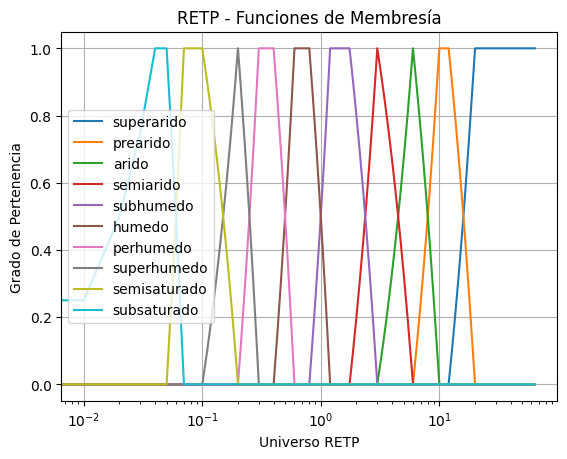

In [468]:
# Graficar las funciones de membresía de RETP
for label in retp.terms:
    plt.plot(universo_retp, retp[label].mf, label=label)

# Etiquetas y título
plt.title('RETP - Funciones de Membresía')
plt.xlabel('Universo RETP')
plt.ylabel('Grado de Pertenencia')
plt.xscale('log')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

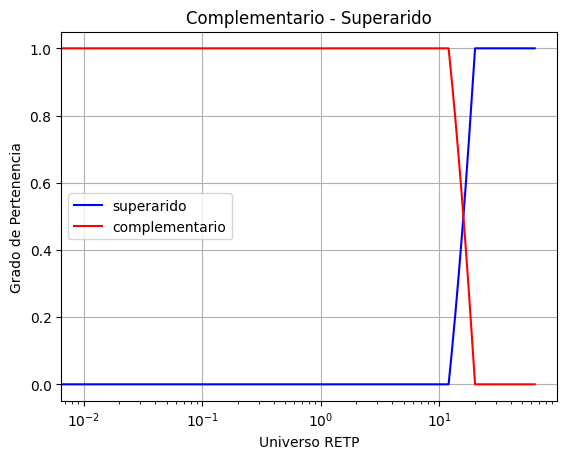

In [469]:
# Obtener la función de membresía para superarido
superarido = retp['superarido'].mf

# Calcular el complemento
superarido_comp = fuzz.fuzzy_not(superarido)

# Graficar
plt.plot(universo_retp, superarido, label="superarido", color='blue')
plt.plot(universo_retp, superarido_comp, label="complementario", color='red')
plt.title('Complementario - Superarido')
plt.xlabel('Universo RETP')
plt.ylabel('Grado de Pertenencia')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [470]:
# Valores a evaluar
valores = [10, 20, 30]

# Calcular el grado de pertenencia para cada valor en todas las funciones de membresía de RETP
pertenencia = [[fuzz.interp_membership(universo_retp, retp[label].mf, x) for label in retp.terms] for x in valores]

# Mostrar los resultados
for i, valor in enumerate(valores):
    print(f"Grados de pertenencia para RETP = {valor}:")
    for j, label in enumerate(retp.terms):
        print(f"  {label}: {pertenencia[i][j]:.4f}")

Grados de pertenencia para RETP = 10:
  superarido: 0.0000
  prearido: 1.0000
  arido: 0.0000
  semiarido: 0.0000
  subhumedo: 0.0000
  humedo: 0.0000
  perhumedo: 0.0000
  superhumedo: 0.0000
  semisaturado: 0.0000
  subsaturado: 0.0000
Grados de pertenencia para RETP = 20:
  superarido: 1.0000
  prearido: 0.0000
  arido: 0.0000
  semiarido: 0.0000
  subhumedo: 0.0000
  humedo: 0.0000
  perhumedo: 0.0000
  superhumedo: 0.0000
  semisaturado: 0.0000
  subsaturado: 0.0000
Grados de pertenencia para RETP = 30:
  superarido: 1.0000
  prearido: 0.0000
  arido: 0.0000
  semiarido: 0.0000
  subhumedo: 0.0000
  humedo: 0.0000
  perhumedo: 0.0000
  superhumedo: 0.0000
  semisaturado: 0.0000
  subsaturado: 0.0000


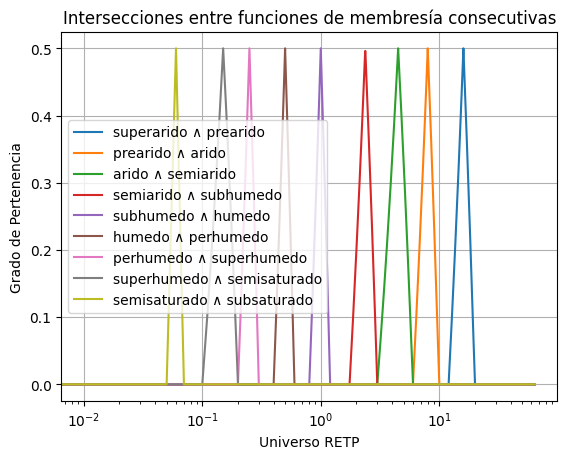

In [471]:
# Graficar las intersecciones entre funciones consecutivas
for i in range(len(labels) - 1):
    interseccion = fuzz.fuzzy_and(universo_retp, retp[labels[i]].mf, universo_retp, retp[labels[i + 1]].mf)[1]
    plt.plot(universo_retp, interseccion, label=f'{labels[i]} ∧ {labels[i+1]}')

plt.title('Intersecciones entre funciones de membresía consecutivas')
plt.xlabel('Universo RETP')
plt.ylabel('Grado de Pertenencia')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

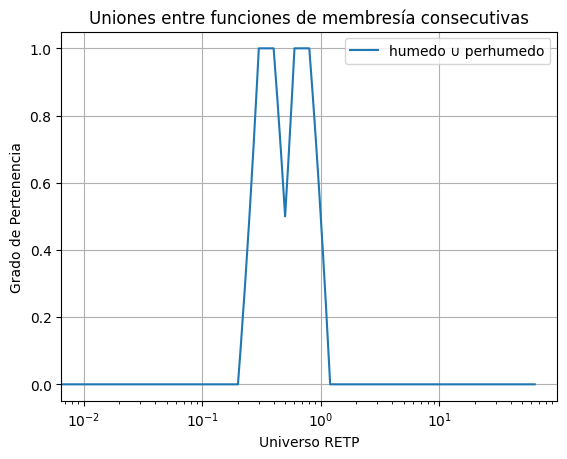

In [472]:
# Graficar la unión entre dos funciones consecutivas
i = 5  # Índice de los conjuntos a unir
union = fuzz.fuzzy_or(universo_retp, retp[labels[i]].mf, universo_retp, retp[labels[i + 1]].mf)[1]
plt.plot(universo_retp, union, label=f'{labels[i]} ∪ {labels[i+1]}')

plt.title('Uniones entre funciones de membresía consecutivas')
plt.xlabel('Universo RETP')
plt.ylabel('Grado de Pertenencia')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [473]:
# Definir el universo de la precipitación
universo_pp = np.arange(0, 16000, 60)

# Definir la variable difusa para PP
pp = ctrl.Antecedent(universo_pp, 'PP')

# Definir las funciones de membresía para PP
pp['semisaturado'] = fuzz.trapmf(universo_pp, [0, 0, 0, 0])
pp['subsaturado'] = fuzz.trapmf(universo_pp, [0, 10, 55, 62.5])
pp['superarido'] = fuzz.trapmf(universo_pp, [62.5, 70, 110, 125])
pp['prearido'] = fuzz.trapmf(universo_pp, [110, 125, 200, 250])
pp['arido'] = fuzz.trapmf(universo_pp, [250, 300, 400, 500])
pp['semiarido'] = fuzz.trapmf(universo_pp, [400, 500, 900, 1000])
pp['subhumedo'] = fuzz.trapmf(universo_pp, [900, 1000, 1800, 2000])
pp['humedo'] = fuzz.trapmf(universo_pp, [1800, 2000, 3800, 4000])
pp['perhumedo'] = fuzz.trapmf(universo_pp, [3800, 4000, 7500, 8000])
pp['superhumedo'] = fuzz.trapmf(universo_pp, [7500, 8000, 15000, 16000])

In [474]:


# Definir los universos
universo_bt = np.arange(0, 30, 0.5)
universo_lat = np.arange(0, 90.01, 1)
universo_alt = np.arange(0, 5000, 150)

# Crear las variables difusas
lat = ctrl.Antecedent(universo_lat, 'latitud')
alt = ctrl.Antecedent(universo_alt, 'altitud')
bt = ctrl.Consequent(universo_bt, 'biotemperatura')

# Asignar las funciones de membresía
bt['tropical'] = fuzz.trapmf(universo_bt, [24, 24.5, 29.5, 30])
bt['subtropical'] = fuzz.trapmf(universo_bt, [18, 18.5, 23.5, 24])
bt['templadoCalido'] = fuzz.trapmf(universo_bt, [12, 12.5, 17.5, 18])
bt['templadoFrio'] = fuzz.trapmf(universo_bt, [6, 6.5, 11.5, 12])
bt['boreal'] = fuzz.trapmf(universo_bt, [3, 3.5, 5.5, 6])
bt['subpolar'] = fuzz.trapmf(universo_bt, [1.3, 1.5, 2.5, 3])
bt['polar'] = fuzz.trapmf(universo_bt, [0, 0.2, 1, 1.3])

lat['tropical'] = fuzz.trapmf(universo_lat, [0, 6, 10, 13])
lat['subtropical'] = fuzz.trapmf(universo_lat, [13, 20, 25, 27.30])
lat['templadoCalido'] = fuzz.trapmf(universo_lat, [27.30, 35, 40, 42])
lat['templadoFrio'] = fuzz.trapmf(universo_lat, [42, 50, 55, 58.30])
lat['boreal'] = fuzz.trapmf(universo_lat, [58.30, 60, 62, 63.48])
lat['subpolar'] = fuzz.trapmf(universo_lat, [63.48, 64, 66, 68])
lat['polar'] = fuzz.trapmf(universo_lat, [68, 73, 87, 90])

alt['basal'] = fuzz.trapmf(universo_alt, [0, 50, 600, 1000])
alt['premontano'] = fuzz.trapmf(universo_alt, [1000, 1200, 1800, 2000])
alt['montanoBajo'] = fuzz.trapmf(universo_alt, [2000, 2200, 2800, 3000])
alt['montano'] = fuzz.trapmf(universo_alt, [3000, 3200, 3800, 4000])
alt['subalpino'] = fuzz.trapmf(universo_alt, [4000, 4100, 4400, 4500])
alt['alpino'] = fuzz.trapmf(universo_alt, [4500, 4550, 4650, 4750])
alt['nival'] = fuzz.trapmf(universo_alt, [4750, 4850, 4950, 5000])

In [475]:
def obtener_etiqueta_biotemperatura(biotemperatura_valor):
    if 24 <= biotemperatura_valor <= 30:
        return 'tropical'
    elif 18 <= biotemperatura_valor < 24:
        return 'subtropical'
    elif 12 <= biotemperatura_valor < 18:
        return 'templado cálido'
    elif 6 <= biotemperatura_valor < 12:
        return 'templado frío'
    elif 3 <= biotemperatura_valor < 6:
        return 'boreal'
    elif 0 <= biotemperatura_valor < 3:
        return 'polar'
    else:
        return 'Desconocido'  

In [476]:
# Definir las reglas difusas IF-THEN
rule1 = ctrl.Rule(lat['tropical'] & alt['basal'], bt['tropical'])
rule2 = ctrl.Rule(lat['tropical'] & alt['montano'], bt['templadoCalido'])
rule3 = ctrl.Rule(lat['templadoFrio'] & alt['montanoBajo'], bt['templadoFrio'])
rule4 = ctrl.Rule(lat['boreal'] & alt['alpino'], bt['boreal'])
rule5 = ctrl.Rule(lat['polar'] & alt['nival'], bt['polar'])

# Crear el sistema de control
bt_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
bt_simulation = ctrl.ControlSystemSimulation(bt_ctrl)

# Probar el sistema con un valor de latitud y altitud
bt_simulation.input['latitud'] = 55  # Templado Frio
bt_simulation.input['altitud'] = 2500  # Montano bajo

# Calcular el valor difuso
bt_simulation.compute()
biotemperatura = bt_simulation.output['biotemperatura']

# Obtener la etiqueta correspondiente para la biotemperatura
etiqueta_biotemperatura = obtener_etiqueta_biotemperatura(biotemperatura)

# Imprimir tanto el valor como la etiqueta
print(f"Biotemperatura estimada: {biotemperatura:.2f} °C, corresponde a la categoría: {etiqueta_biotemperatura}")

Biotemperatura estimada: 9.00 °C, corresponde a la categoría: templado frío


In [477]:
def calcular_RETP(BT_anual, PP_anual):
    if PP_anual <= 0:
        raise ValueError("La precipitación media anual (PP) debe ser mayor a 0")
    RETP = (BT_anual * 58.93) / PP_anual
    return RETP

# Ejemplo de cálculo de RETP con precipitación
PP_anual = 1200  # Precipitación en mm
RETP = calcular_RETP(biotemperatura, PP_anual)
print(f"Ratio de Evapotranspiración Potencial: {RETP:.2f}")

Ratio de Evapotranspiración Potencial: 0.44


In [478]:
def calcular_biotemperatura_mensual(Tm, Tmmax=None, Tmmin=None, LAT=None):
    if Tm < 6:
        if Tmmax is not None and Tmmin is not None:
            BTm = (Tmmax ** 2) / (2 * (Tmmax - Tmmin))
        else:
            raise ValueError("Para Tm < 6°C, se requieren Tmmax y Tmmin")
    elif 6 <= Tm <= 24:
        BTm = Tm
    elif Tm > 24 and LAT is not None:
        BTm = Tm - (3 * LAT / 100) * (Tm - 24) ** 2
    else:
        raise ValueError("Para Tm > 24°C, se requiere la latitud (LAT)")
    
    return BTm

def calcular_biotemperatura_anual(Tms, Tmmax_list=None, Tmmin_list=None, LAT=None):
    BTms = []
    
    for i, Tm in enumerate(Tms):
        if Tm < 6:
            BTm = calcular_biotemperatura_mensual(Tm, Tmmax_list[i], Tmmin_list[i], LAT)
        elif 6 <= Tm <= 24:
            BTm = Tm
        else:
            BTm = calcular_biotemperatura_mensual(Tm, LAT=LAT)
        
        # Sustitución por 0 si BTm < 0 y por 30 si BTm > 30
        BTms.append(min(max(BTm, 0), 30))
    
    # Calcular el promedio de las biotemperaturas mensuales
    BT_anual = np.mean(BTms)
    
    return BT_anual

# Ejemplo de uso
Tms = [5, 10, 15, 25, 30]  # Temperaturas mensuales
Tmmax_list = [8, 12, 20, None, None]  # Máximas para Tm < 6
Tmmin_list = [2, 7, 10, None, None]   # Mínimas para Tm < 6
LAT = 10  # Latitud

BT_anual = calcular_biotemperatura_anual(Tms, Tmmax_list, Tmmin_list, LAT)
print(f"Biotemperatura Anual: {BT_anual:.2f}°C")

Biotemperatura Anual: 14.85°C


In [479]:
BT_anual = calcular_biotemperatura_anual(Tms, Tmmax_list, Tmmin_list, LAT)
PP_anual = 1200  # Precipitación media anual en mm
RETP = calcular_RETP(BT_anual, PP_anual)
print(f"Ratio de Evapotranspiración Potencial: {RETP:.2f}")

Ratio de Evapotranspiración Potencial: 0.73


In [480]:
def obtener_etiqueta_zona_vida(zona_vida_valor):
    if 0 <= zona_vida_valor <= 20:
        return 'tropical'
    elif 15 <= zona_vida_valor <= 30:
        return 'subtropical'
    elif 25 <= zona_vida_valor <= 50:
        return 'templado'
    elif 40 <= zona_vida_valor <= 80:
        return 'boreal'
    elif 70 <= zona_vida_valor <= 100:
        return 'polar'
    else:
        return 'Desconocido'  

In [481]:
# Definir el universo para Zonas de Vida y asignar funciones de membresía
universo_zv = np.arange(0, 100, 1)
zv = ctrl.Consequent(universo_zv, 'ZonaVida')
bt = ctrl.Antecedent(universo_bt, 'biotemperatura')

# He tenido que volver a asignar las funciones de membresía de biotemperatura porque antes era consecuente y ahora antecedente
bt['tropical'] = fuzz.trapmf(universo_bt, [24, 24.5, 29.5, 30])
bt['subtropical'] = fuzz.trapmf(universo_bt, [18, 18.5, 23.5, 24])
bt['templadoCalido'] = fuzz.trapmf(universo_bt, [12, 12.5, 17.5, 18])
bt['templadoFrio'] = fuzz.trapmf(universo_bt, [6, 6.5, 11.5, 12])
bt['boreal'] = fuzz.trapmf(universo_bt, [3, 3.5, 5.5, 6])
bt['subpolar'] = fuzz.trapmf(universo_bt, [1.3, 1.5, 2.5, 3])
bt['polar'] = fuzz.trapmf(universo_bt, [0, 0.2, 1, 1.3])

# Asignar funciones de membresía
zv['tropical'] = fuzz.trapmf(universo_zv, [0, 0, 15, 20])
zv['subtropical'] = fuzz.trapmf(universo_zv, [15, 20, 25, 30])
zv['templado'] = fuzz.trapmf(universo_zv, [25, 30, 40, 50])
zv['boreal'] = fuzz.trapmf(universo_zv, [40, 50, 70, 80])
zv['polar'] = fuzz.trapmf(universo_zv, [70, 80, 100, 100])

# Reglas difusas para relacionar la biotemperatura, precipitación y RETP con la Zona de Vida
rule11 = ctrl.Rule(bt['tropical'] & pp['subhumedo'], zv['tropical'])
rule12 = ctrl.Rule(bt['subtropical'] & pp['semiarido'], zv['subtropical'])
rule13 = ctrl.Rule(bt['templadoCalido'] & pp['arido'], zv['templado'])
rule14 = ctrl.Rule(bt['boreal'] & pp['superarido'], zv['boreal'])
rule15 = ctrl.Rule(bt['polar'] & pp['subsaturado'], zv['polar'])

# Crear el sistema de control
zv_ctrl = ctrl.ControlSystem([rule11])
zv_simulation = ctrl.ControlSystemSimulation(zv_ctrl)

# Calcular valor difuso
zv_simulation.input['biotemperatura'] = 25  # Ejemplo: tropical
zv_simulation.input['PP'] = 1500  # Precipitación en mm (subhumedo)
zv_simulation.compute()

# Obtener el valor de la zona de vida
zona_vida = zv_simulation.output['ZonaVida']

# Obtener la etiqueta correspondiente
etiqueta_zona_vida = obtener_etiqueta_zona_vida(zona_vida)

# Imprimir tanto el valor como la etiqueta
print(f"Zona de Vida estimada: {zona_vida:.2f} corresponde a la categoría: {etiqueta_zona_vida}")

Zona de Vida estimada: 8.81 corresponde a la categoría: tropical
